`

# What is Matplotlib?
Matplotlib is the core Python library for data visualization.

In Machine Learning, Computer Vision, and Medical Imaging, it is primarily used to:

- Visualize images stored as NumPy arrays
- Inspect preprocessing steps
- Plot training and validation metrics
- Analyze data distributions
- Generate figures for reports and scientific papers
# Why Matplotlib is Essential in Computer Vision
Matplotlib enables you to:

- Display grayscale and RGB images correctly
- Verify normalization and preprocessing
- Detect noise, contrast issues, and artifacts
- Compare model performance across epochs
- Communicate results clearly to researchers and clinicians
It acts as the visual interface between raw data and human understanding.
## Common Professional Use Cases
1. Line Plots (Training Curves)
Used for:

- Training loss
- Validation loss
- Accuracy over epochs
  
```python
plt.plot(epochs, loss)
```

2. Image Visualization
The most important use case in Computer Vision.

Grayscale image:
```python
plt.imshow(img, cmap='gray')
```
RGB image:
```python
plt.imshow(img)
plt.axis('off')
```
3. Pixel Intensity Histograms
Used to analyze:

- Contrast
- Brightness
- Noise distribution
```python
plt.hist(img.flatten(), bins=50)

```
4. sunplots
   Display multiple views at once
   
```python
fig, axes = plt.subplots(1, 2)
```

Common example:

- Original image
- Histogram or processed image

5. Confusion Matrix Visualization
```python
plt.imshow(cm , cmap='Blues')
```

# Exercise 1
Display a random grayscale image and remove axes.

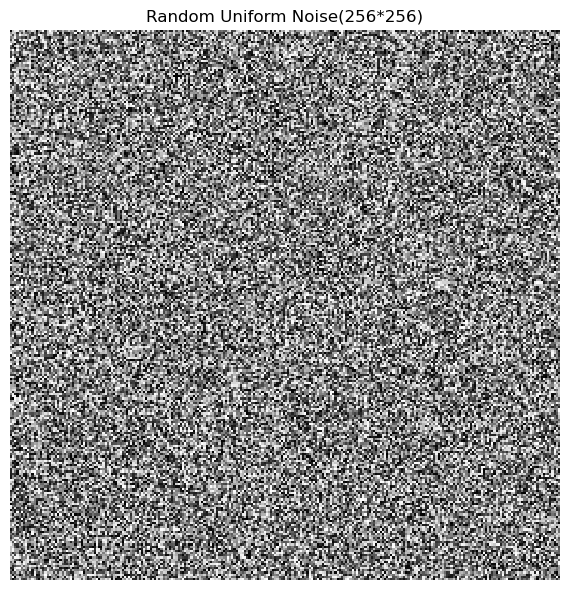

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generate_and_display_random_noise():
    """
    Generates a random 256*256 grayscale image (White Noise) 
    and displays it without axes.
    """
    # 1. Define Parameters
    height, width = 256, 256
    # 2. Generate Data
    random_image = np.random.randint(low=0, high=256,size=(height, width),
                                    dtype=np.uint8)
    #3. Setup Visualization
    plt.figure(figsize=(6,6)) # Define a square canvas
    #4. Render Image
    plt.imshow(random_image, cmap='gray', vmin=0, vmax=255, interpolation='nearest')
    #5. Remove Axes
    plt.axis('off')
    plt.title(f'Random Uniform Noise({height}*{width})')
    plt.tight_layout()
    plt.show()
if __name__ == '__main__':
    generate_and_display_random_noise()

# Exercise 2
Plot the histogram of pixel intensities of an image.

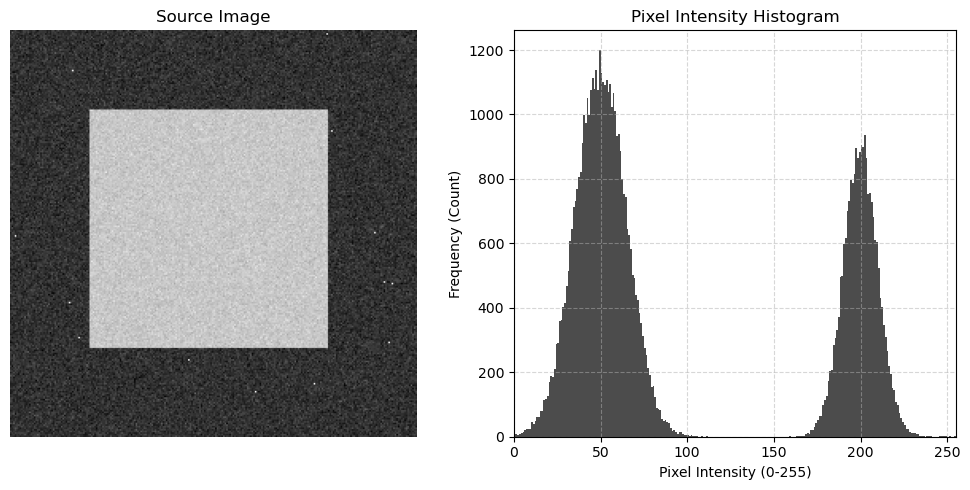

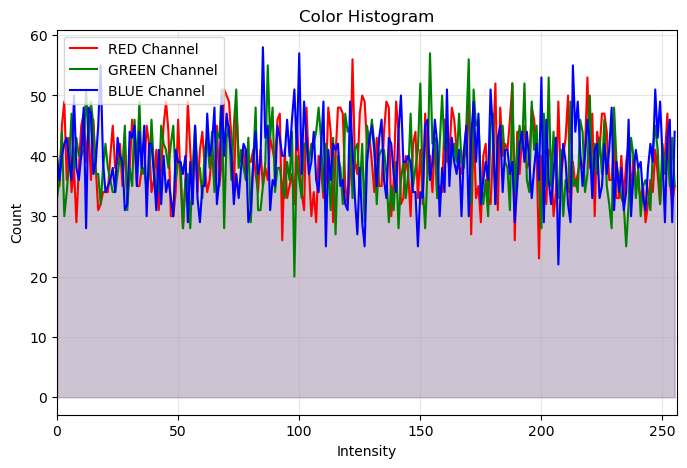

In [25]:
import numpy as np
import matplotlib.pyplot as plt
def generate_sample_image():
    """
    Generates a synthetic image with distinct tonal regions to make 
    the histogram interesting.
    """
    # Create a blank image
    img = np.zeros((256, 256), dtype=np.uint8)
    # Add a dark background (Guassian noise)
    img[:, :] = np.random.normal(50, 15, (256, 256)).astype(np.uint8)
    # Add a bright square (Gussian noise)
    img[50:200, 50:200] = np.random.normal(200,10,(150,150)).astype(np.uint8)

    return img
def plot_histogram_grayscale(image_array):
    """
    Plot the pixle intensity histogram of gray scale image
    """
    plt.figure(figsize=(10,5))
    # subplot 1 : the image
    plt.subplot(1,2,1)
    plt.imshow(image_array, cmap='gray', vmin=0, vmax = 255)
    plt.title("Source Image")
    plt.axis('off')

    # subplot2: The histogram
    plt.subplot(1,2,2)
    plt.hist(image_array.ravel(), bins=256, range=(0, 256), color='black', alpha=0.7)
    plt.title("Pixel Intensity Histogram")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency (Count)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlim([0, 255])
    plt.tight_layout()
    plt.show()

def plot_histogram_color(image_rgb):
    """
    Plots the histogram for each channel (R, G, B) separately.
    """
    colors = ('red', 'green', 'blue')
    plt.figure(figsize=(8, 5))
    
    plt.title("Color Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    
    # Loop over the 3 channels
    for i, color in enumerate(colors):
        # Extract the specific channel
        channel_data = image_rgb[:, :, i]
        
        # Plot using a line graph (standard for multi-channel overlap)
        # Using numpy.histogram to compute counts efficiently
        counts, bin_edges = np.histogram(channel_data, bins=256, range=(0, 256))
        
        plt.plot(bin_edges[0:-1], counts, color=color, label=f'{color.upper()} Channel')
        plt.fill_between(bin_edges[0:-1], counts, color=color, alpha=0.1)

    plt.legend()
    plt.xlim([0, 256])
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    # 1. Grayscale Demo
    gray_img = generate_sample_image()
    plot_histogram_grayscale(gray_img)
    
    # 2. Color Demo (Creating a random RGB image)
    rgb_img = np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8)
    # Let's bias the Red channel to be brighter to see it in the plot
    rgb_img[:, :, 0] = np.clip(rgb_img[:, :, 0] + 50, 0, 255)
    
    plot_histogram_color(rgb_img)